# Lab: CV w/CNNs

# Part 1: Libraries & Preprocessing

### Step 1: Libraries

Bring in the germane libraries.

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [58]:
# Set deterministic seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

tf.config.experimental.enable_op_determinism()

### Step 2: Data

Download and fetch the data with the following Python code (Note: We will use faces.images for X.)

In [38]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

### Step 3: Sample Image

Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function).

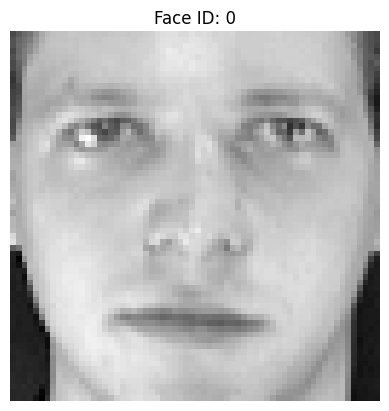

In [ ]:
# Selecting an image
def print_face(index):
    plt.imshow(X[index], cmap=plt.cm.gray)
    plt.axis("off")
    plt.title(f"Face ID: {y[index][0]}")
    plt.show()
    
print_face(0)

### Step 4: Training and testing sets

Setup training and testing sets . Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation.

In [ ]:
# Creating the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    stratify=y, random_state=42)

# Print dimensions of feature matrices
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (200, 64, 64)
Testing set shape: (200, 64, 64)


In [5]:
type(faces)
# Looks like we have a Bunch of faces

sklearn.utils._bunch.Bunch

### Step 5: Vector conversion

Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors.

In [41]:
# Conversion
y_train_one_hot = to_categorical(y_train, num_classes=40)
y_test_one_hot = to_categorical(y_test, num_classes=40)
y_train_one_hot.shape, y_test_one_hot.shape

((200, 40), (200, 40))

### Step 6: Reshape arrays

Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays.

In [ ]:
# Reshape
# Reshape images to have 4 dimensions: (num_images, width, height, num_channels)
X_train_reshaped = X_train.reshape((X_train.shape[0], 64, 64, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], 64, 64, 1))

# Print new shape of image arrays
print(f"Reshaped training set shape: {X_train_reshaped.shape}")
print(f"Reshaped testing set shape: {X_test_reshaped.shape}")

Reshaped training set shape: (200, 64, 64, 1)
Reshaped testing set shape: (200, 64, 64, 1)


## Part 2: Model 1

### Step 7: Model 1's Architecture

Fit a convolutional neural network using the following architecture, and print the output from training.
*   1 convolutional layer with:
  * 16 filters (neurons)
  * a window size of 3
  * stride size of 1
  * ReLU activation function
  * padding so that the feature is the same size as the original image
*   1 max pooling layer with:
  * window size of 2
  * stride size of 2
  * no padding
*   1 fully connected output layer with:
  * 40 nodes for each face to predict
  * softmax activation function
*   For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [44]:
input_tensor = Input(shape=(64, 64, 1))

# Convolution Neural Network Model - Define the CNN architecture
model = Sequential([
    input_tensor,
    Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Flatten(),
    # Output layer with 40 nodes (one per person) and softmax activation
    Dense(40, activation='softmax')
])

In [61]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_one_hot,
                    validation_data=(X_test_reshaped, y_test_one_hot),
                    epochs=20, batch_size=10, verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 1.0750e-05 - val_accuracy: 0.9350 - val_loss: 0.2974
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 3.1244e-06 - val_accuracy: 0.9400 - val_loss: 0.3020
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 3.1003e-06 - val_accuracy: 0.9400 - val_loss: 0.3104
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 1.7226e-06 - val_accuracy: 0.9400 - val_loss: 0.3070
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 1.1626e-06 - val_accuracy: 0.9400 - val_loss: 0.3090
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 9.0515e-07 - val_accuracy: 0.9400 - val_loss: 0.3090
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 7.8824e-07 - val_accuracy: 0.9400 - val_loss: 0.3101
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 7.0393e-07

### Step 8: Model 1's loss and accuracy

Print the loss and accuracy on the test set.

In [62]:
# Loss and Accuracy
loss, accuracy = model.evaluate(X_test_reshaped, y_test_one_hot, verbose=0)

# Print results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3145
Test Accuracy: 0.9400


2025-05-28 03:27:00.126277: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


### Step 9: Print image

Pick one of the images from the test set, and print the image.

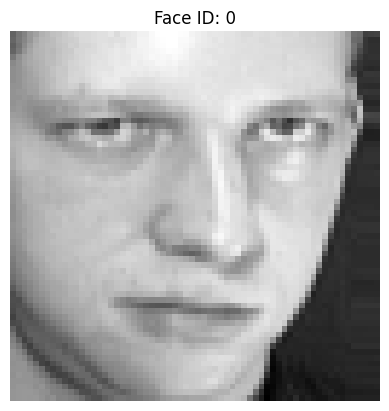

In [29]:
# An image
print_face(9) # We're on step 9, so when in Rome

### Step 10: Feature maps

For the image you selected in (9), print the images of the feature maps from both the convolutional and pooling layers.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Visualizing 16 Convolutional Feature Maps for image 9 (from original X array)...
Visualizing 16 Pooling Feature Maps for image 9 (from original X array)...


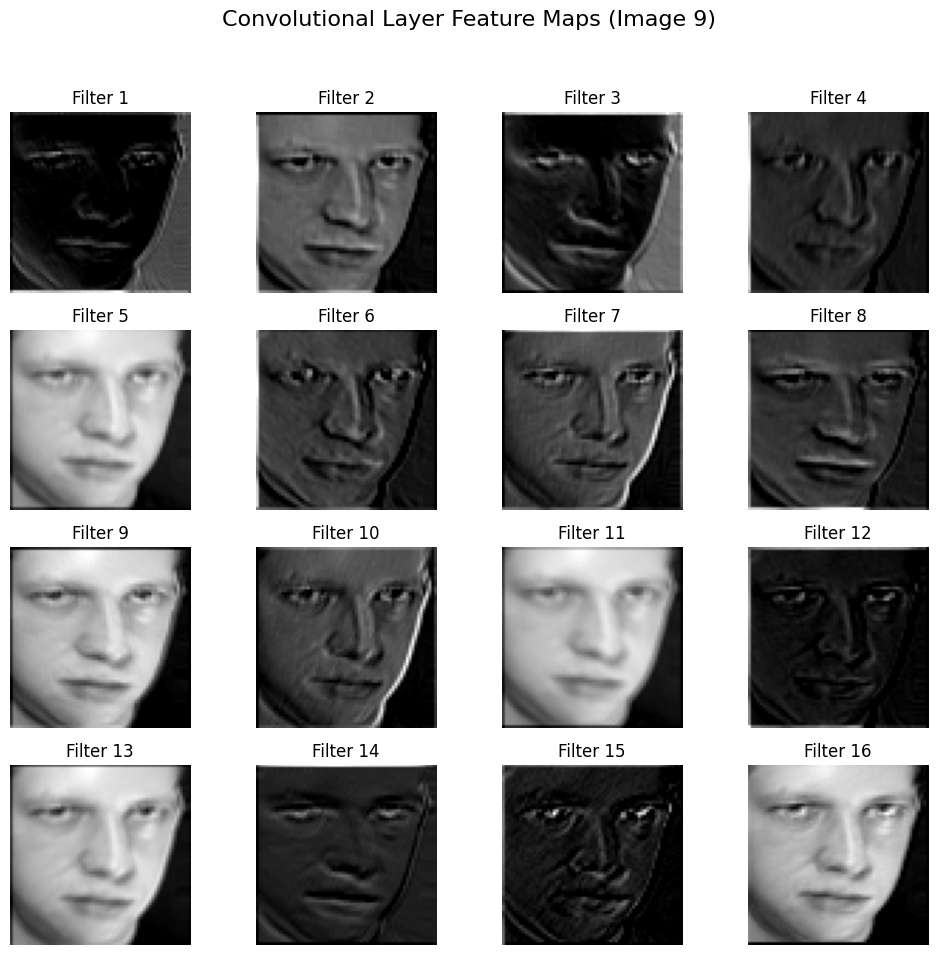

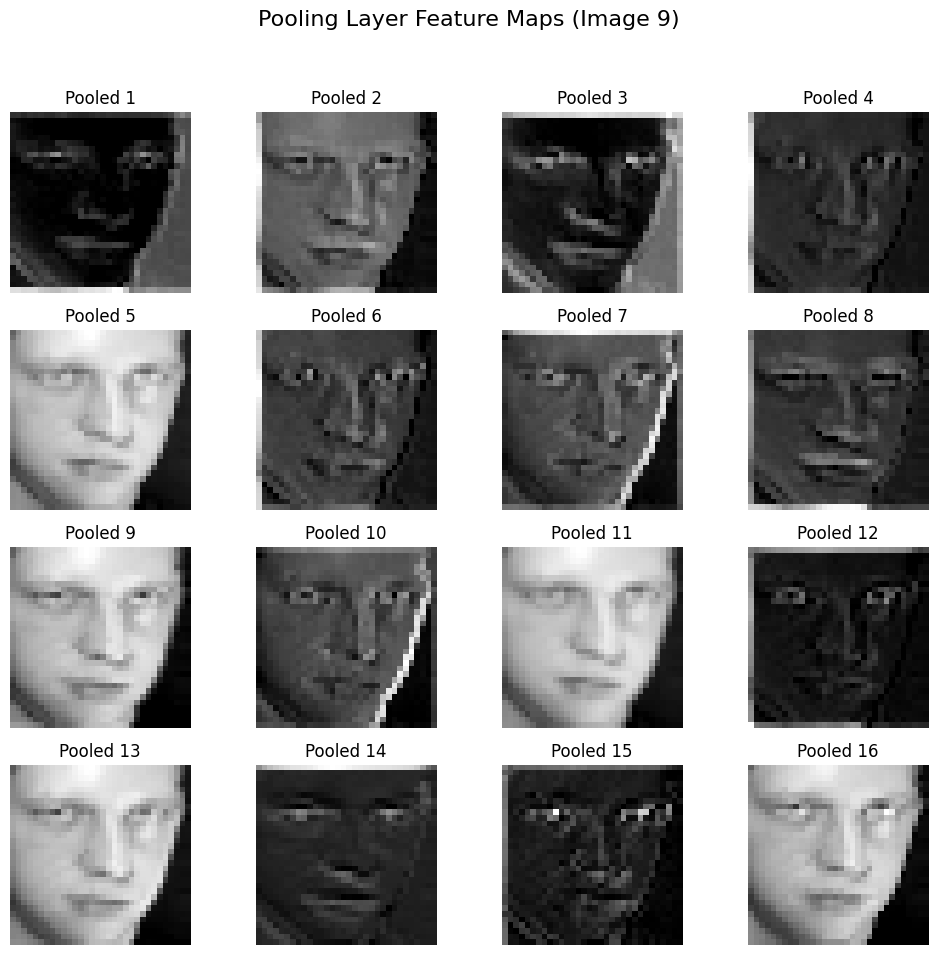

In [ ]:
image_index = 9

# print_face uses X[image_index].
# we reshape it to (1, height, width, 1) for the model.
input_image_for_model = X[image_index].reshape(1, 64, 64, 1)

# 2. Create new Keras models to extract output from intermediate layers
# Get the output of the first layer (Conv2D)
conv_layer_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
# Get the output of the second layer (MaxPooling2D)
pooling_layer_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

# 3. Get the feature maps for the selected image
conv_feature_maps = conv_layer_model.predict(input_image_for_model)
pooling_feature_maps = pooling_layer_model.predict(input_image_for_model)

# --- For loop to visualize feature maps ---

# --- Visualize Convolutional Layer Feature Maps ---
num_filters_conv = conv_feature_maps.shape[-1] # This will be 16, as defined in your Conv2D layer
rows_conv = math.ceil(math.sqrt(num_filters_conv)) # Calculate grid dimensions for plotting
cols_conv = math.ceil(num_filters_conv / rows_conv)

print(f"Visualizing {num_filters_conv} Convolutional Feature Maps for image {image_index} (from original X array)...")
plt.figure(figsize=(cols_conv * 2.5, rows_conv * 2.5))
plt.suptitle(f"Convolutional Layer Feature Maps (Image {image_index})", fontsize=16)

for i in range(num_filters_conv):
    ax = plt.subplot(rows_conv, cols_conv, i + 1)
    plt.imshow(conv_feature_maps[0, :, :, i], cmap='gray')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 1])

# The number of filters remains the same after pooling
num_filters_pool = pooling_feature_maps.shape[-1]
rows_pool = math.ceil(math.sqrt(num_filters_pool))
cols_pool = math.ceil(num_filters_pool / rows_pool)

print(f"Visualizing {num_filters_pool} Pooling Feature Maps for image {image_index} (from original X array)...")
plt.figure(figsize=(cols_pool * 2.5, rows_pool * 2.5)) # Adjust figure size
plt.suptitle(f"Pooling Layer Feature Maps (Image {image_index})", fontsize=16)

for i in range(num_filters_pool):
    ax = plt.subplot(rows_pool, cols_pool, i + 1)
    plt.imshow(pooling_feature_maps[0, :, :, i], cmap='gray')
    plt.title(f'Pooled {i+1}')
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

## Part 3: Model 2




### Step 11: Model 2's Architecture

Fit the model from (7) again, but this time use a window size of 9 for the convolution layer.

In [ ]:
# Change model1 so that it has a window size of 9.

# Convolution Neural Network Model


In [ ]:
# Compiling model2


### Step 12: Model 2's loss and accuracy

Print the loss accuracy on the test set.

In [ ]:
# Loss and Accuracy


### Step 13: Feature Maps

Print the feature maps for the model in for the same image you used in (9) and (10).

In [ ]:
# Feature maps


# For loop


plt.show

## Part IV: Model comparison & model optimization


### Step 14: Model comparison

Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set?

### Step 15: Model 3- Optimized neural network

Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set:
*   Number of convolutional and pooling layers
*   Number of filters in the convolutional layer
*   Window size
*   Number of fully connected layers and neurons
*   Regularization (L1/L2 penalty, dropout, early stopping)
*   Number of epochs and batch size

Call this model `model3`.

In [ ]:
# Convolution Neural Network Model


In [ ]:
# Compiling model3


### Step 16: Reflection on Model 3

Write a few sentences describing how you optimized the model in this part. What worked well?